In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
df = pd.read_excel('sample_data/Folds5x2_pp.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [ ]:
names = df.columns.values.tolist()[:-1]
n = len(names)
names

['AT', 'V', 'AP', 'RH']

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

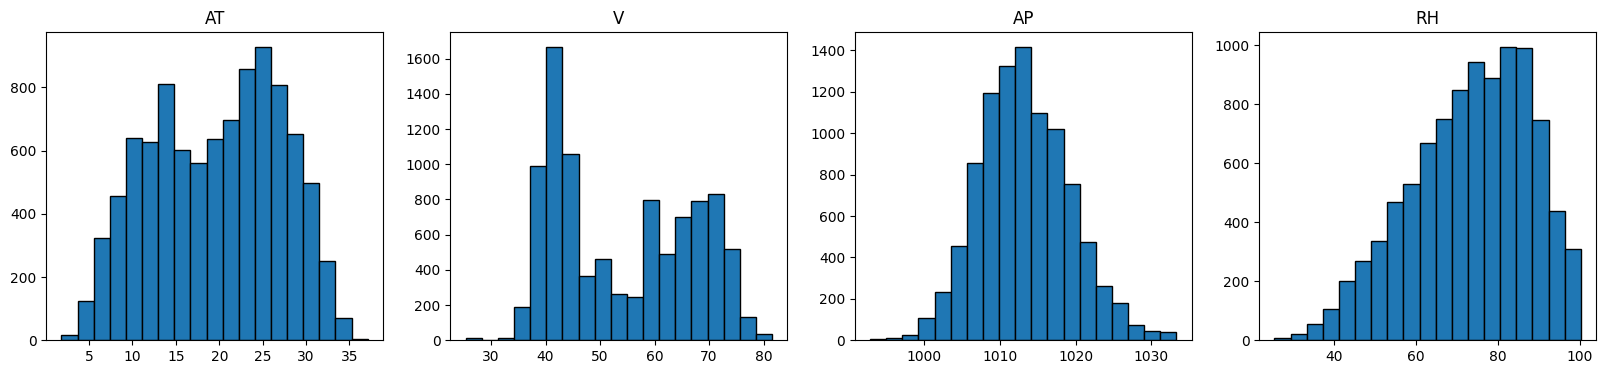

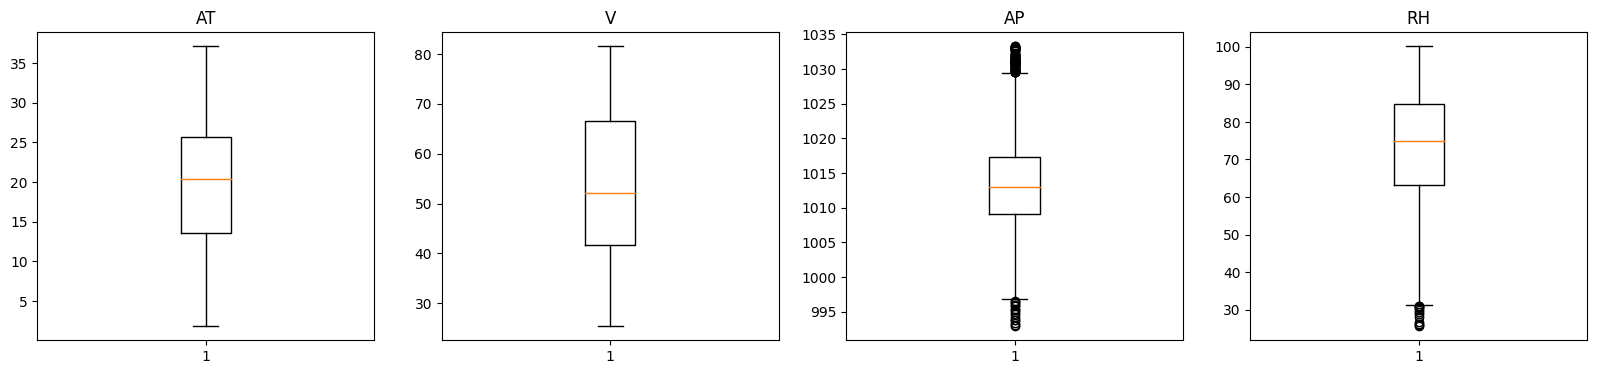

In [ ]:
#@title Гистограммы и Box-and-Whisker
fig, ax = plt.subplots(1, n, figsize=(20,4))
for i in range(n):
    x = df[names[i]].to_numpy()
    ax[i].hist(x, bins=np.linspace(min(x), max(x), 20), edgecolor='black')
    ax[i].set_title(names[i])

fig, ax = plt.subplots(1, n, figsize=(20,4))
for i in range(n):
    x = df[names[i]].to_numpy()
    ax[i].boxplot(x)
    ax[i].set_title(names[i])
df.isnull().sum()

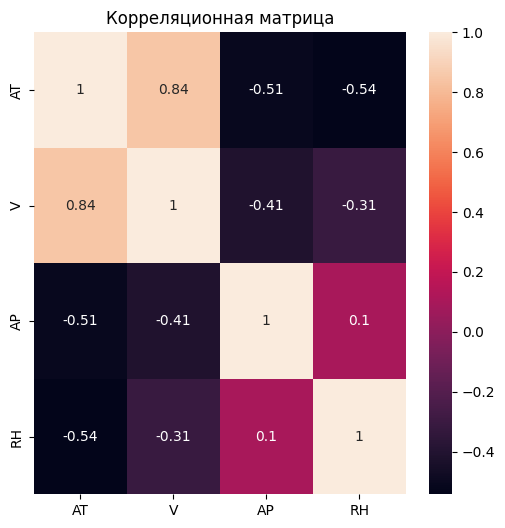

In [ ]:
#@title Корреляционная матрица
corr_matrix = df.loc[:, names].corr()

fig, ax = plt.subplots(1, 1, figsize=(6,6))
hm = sns.heatmap(corr_matrix, annot=True)
hm.set_title('Корреляционная матрица');

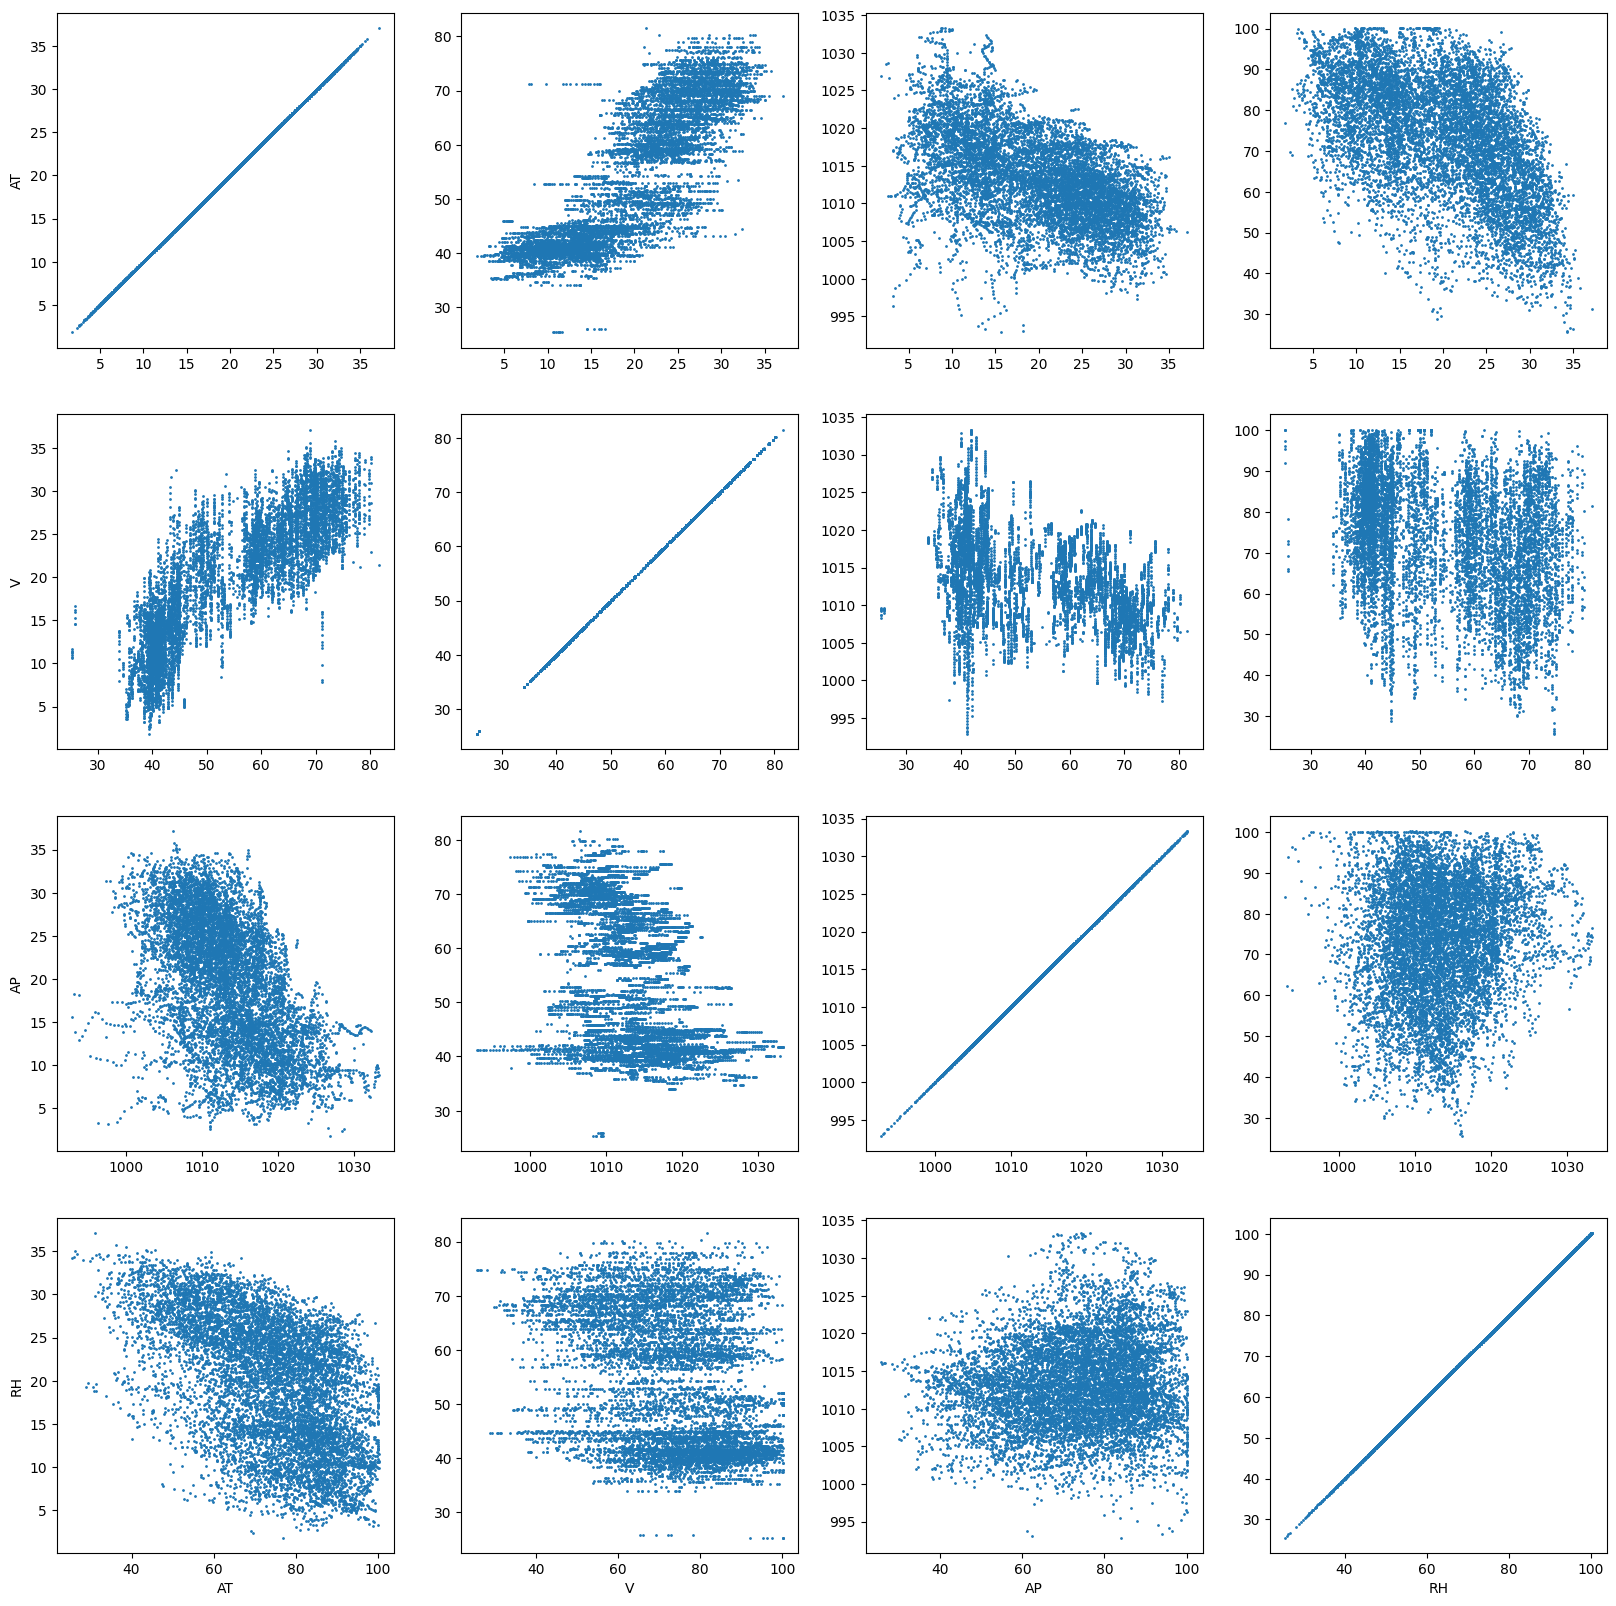

In [ ]:
#@title Scatter_plot
fig, ax = plt.subplots(n, n, figsize=(20,20))

for i, x in enumerate(names):
    for j, y in enumerate(names):
        ax[i][j].scatter(df[x], df[y], s=1)
        ax[-1][j].set_xlabel(y)
    ax[i][0].set_ylabel(x)

In [ ]:
#@title Устранены дубликаты 
df = df.drop_duplicates().reset_index(drop=True)
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9522,16.65,49.69,1014.01,91.00,460.03
9523,13.19,39.18,1023.67,66.78,469.62
9524,31.32,74.33,1012.92,36.48,429.57
9525,24.48,69.45,1013.86,62.39,435.74


In [ ]:
#@title Пропущенных значений не обнаружено
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [ ]:
#@title Стандартизация
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[names] = scaler.fit_transform(df[names])
df[['PE']] = scaler.fit_transform(df[['PE']])
df

,AT,V,AP,RH,PE
0,0.372521,0.291815,0.771591,0.638204,0.569536
1,0.662040,0.669039,0.671863,0.449330,0.319338
2,0.093484,0.249822,0.476862,0.892493,0.904636
3,0.539660,0.568683,0.429349,0.684718,0.347285
4,0.255241,0.216014,0.404355,0.952547,0.710464
...,...,...,...,...,...
9522,0.420397,0.432918,0.522643,0.877212,0.526755
9523,0.322380,0.245907,0.761693,0.552547,0.653775
9524,0.835977,0.871352,0.495669,0.146381,0.123311
9525,0.642210,0.784520,0.518931,0.493700,0.205033


In [ ]:
#@title Удаление выбросов
Q1 = df['RH'].quantile(0.25)
Q3 = df['RH'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
upper_array = np.where(df['RH']>=upper)[0]
lower_array = np.where(df['RH']<=lower)[0]

df = df.drop(index=upper_array)
df = df.drop(index=lower_array)
df = df.reset_index(drop=True)


Q1 = df['AP'].quantile(0.25)
Q3 = df['AP'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
upper_array = np.where(df['AP']>=upper)[0]
lower_array = np.where(df['AP']<=lower)[0]

df = df.drop(index=upper_array)
df = df.drop(index=lower_array)
df = df.reset_index(drop=True)

df

,AT,V,AP,RH,PE
0,0.372521,0.291815,0.771591,0.638204,0.569536
1,0.662040,0.669039,0.671863,0.449330,0.319338
2,0.093484,0.249822,0.476862,0.892493,0.904636
3,0.539660,0.568683,0.429349,0.684718,0.347285
4,0.255241,0.216014,0.404355,0.952547,0.710464
...,...,...,...,...,...
9418,0.420397,0.432918,0.522643,0.877212,0.526755
9419,0.322380,0.245907,0.761693,0.552547,0.653775
9420,0.835977,0.871352,0.495669,0.146381,0.123311
9421,0.642210,0.784520,0.518931,0.493700,0.205033


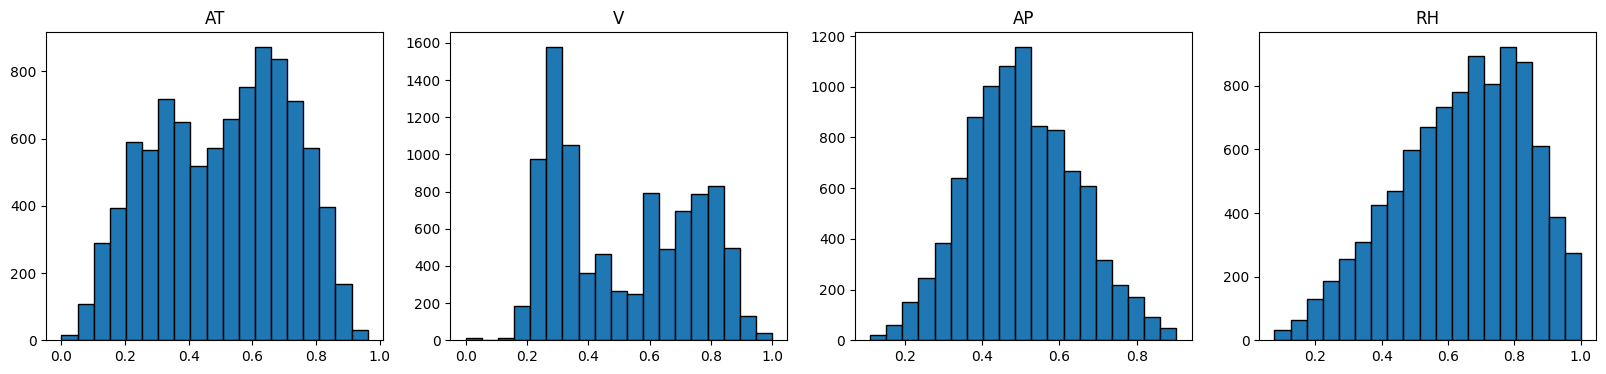

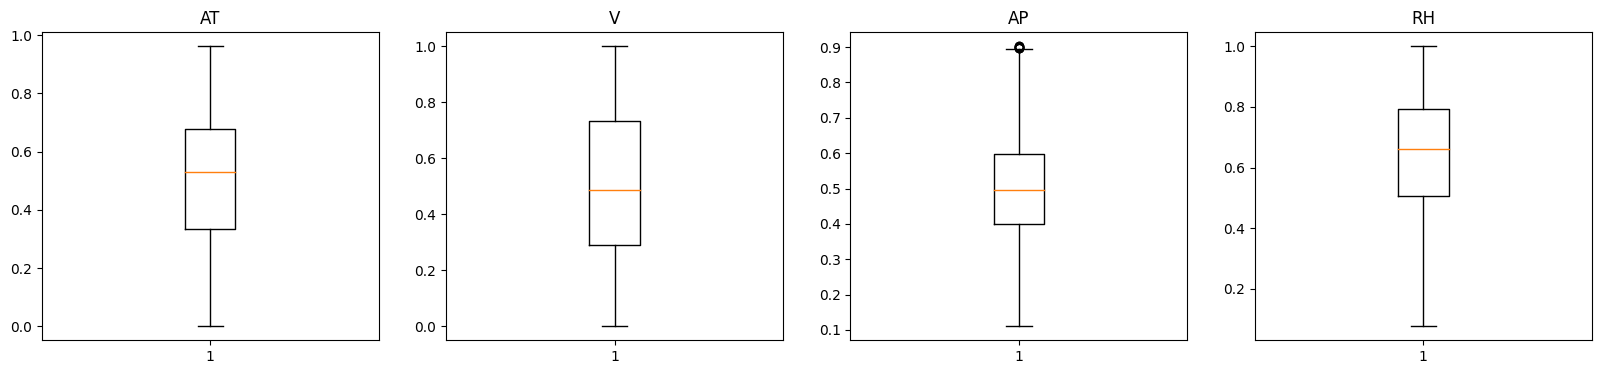

In [ ]:
#@title Гистограммы и Box-and-Whisker
fig, ax = plt.subplots(1, n, figsize=(20,4))
for i in range(n):
    x = df[names[i]].to_numpy()
    ax[i].hist(x, bins=np.linspace(min(x), max(x), 20), edgecolor='black')
    ax[i].set_title(names[i])

fig, ax = plt.subplots(1, n, figsize=(20,4))
for i in range(n):
    x = df[names[i]].to_numpy()
    ax[i].boxplot(x)
    ax[i].set_title(names[i])

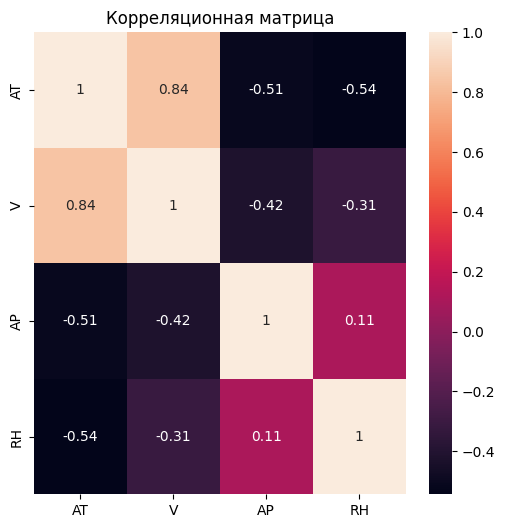

In [ ]:
#@title Корреляционная матрица
corr_matrix = df.loc[:, names].corr()

fig, ax = plt.subplots(1, 1, figsize=(6,6))
hm = sns.heatmap(corr_matrix, annot=True)
hm.set_title('Корреляционная матрица');

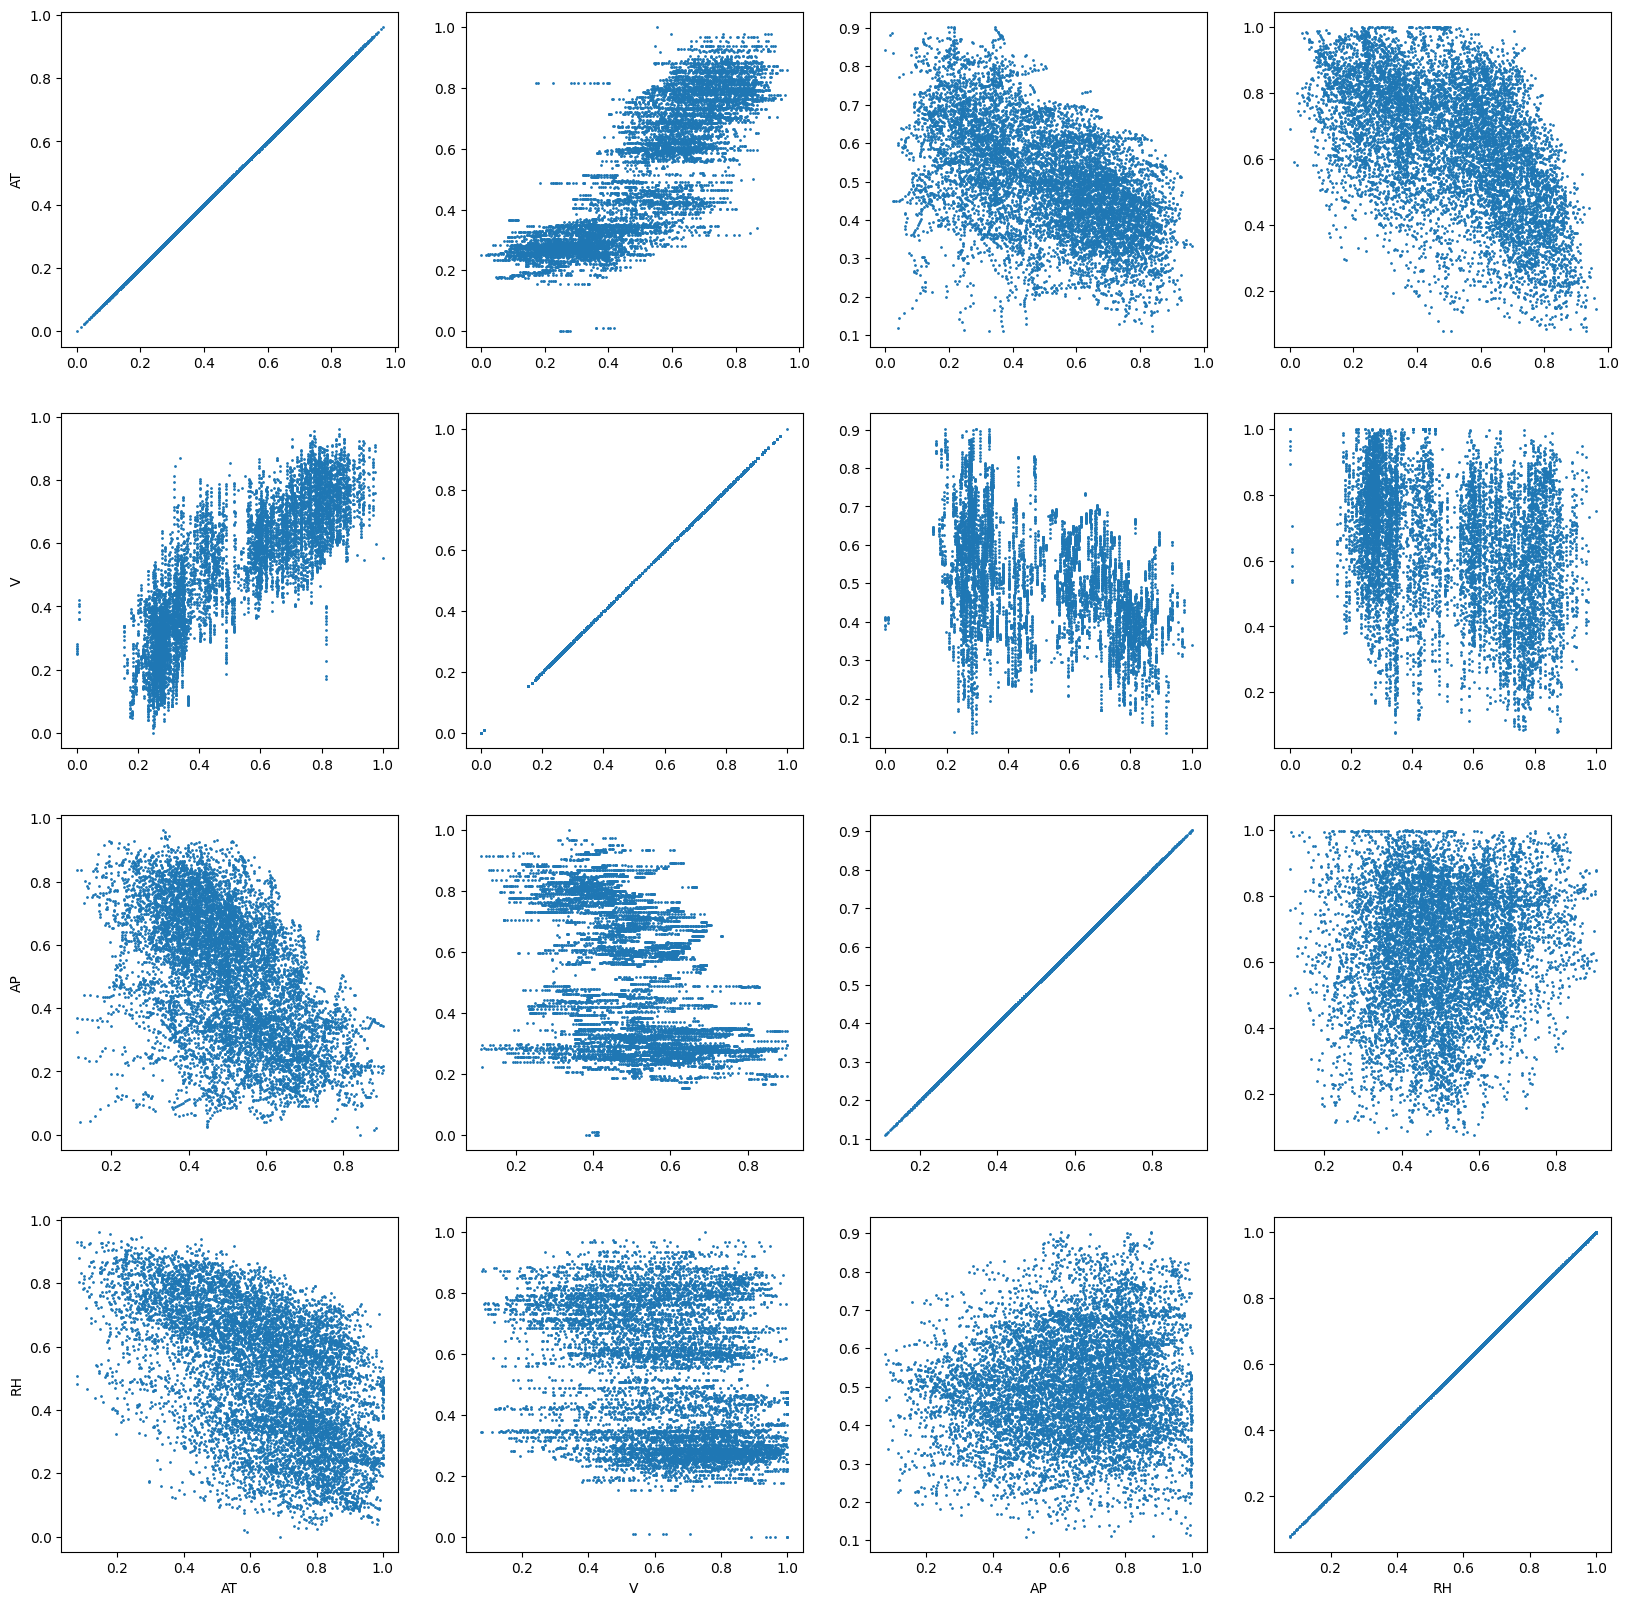

In [ ]:
#@title Scatter_plot
fig, ax = plt.subplots(n, n, figsize=(20,20))

for i, x in enumerate(names):
    for j, y in enumerate(names):
        ax[i][j].scatter(df[x], df[y], s=1)
        ax[-1][j].set_xlabel(y)
    ax[i][0].set_ylabel(x)

In [ ]:
train_percent = 0.6
valid_percent = 0.3
test_percent = 0.1
l = len(df)
df_train = df[:int(train_percent*l)].reset_index(drop=True)
df_valid = df[int(train_percent*l):int((train_percent+valid_percent)*l)].reset_index(drop=True)
df_test = df[int((train_percent+valid_percent)*l):].reset_index(drop=True)

_data_train_x = df_train[['AT', 'V', 'AP', 'RH']].to_numpy()
_data_train_y = df_train[['PE']].to_numpy()

_data_validation_x = df_valid[['AT', 'V', 'AP', 'RH']].to_numpy()
_data_validation_y = df_valid[['PE']].to_numpy()

_data_test_x = df_test[['AT', 'V', 'AP', 'RH']].to_numpy()
_data_test_y = df_test[['PE']].to_numpy()

In [ ]:
# Метод инициализации Хавьера
kernel_initializer = keras.initializers.GlorotNormal(seed=1)
bias_initializer = keras.initializers.GlorotNormal(seed=1)

firstLayerAmountOfNeurons = 20
secondLayerAmountOfNeurons = 10

learning_rate = 0.01
batch_size = len(df_train)

In [ ]:
inputLayer = tf.keras.layers.Input(shape=(len(names),))

firstHiddenLayer = tf.keras.layers.Dense(
    10,
    activation        ='tanh', 
    kernel_initializer=kernel_initializer, 
    bias_initializer  =bias_initializer,
    name              ='First_Hidden'
)(inputLayer)

secondHiddenLayer = tf.keras.layers.Dense(
    10,
    activation        ='tanh', 
    kernel_initializer=kernel_initializer, 
    bias_initializer  =bias_initializer,
    name              ='Second_Hidden'
)(firstHiddenLayer)

thirdHiddenLayer = tf.keras.layers.Dense(
    5,
    activation        ='tanh', 
    kernel_initializer=kernel_initializer, 
    bias_initializer  =bias_initializer,
    name              ='Third_Hidden'
)(secondHiddenLayer)

outputLayer = tf.keras.layers.Dense(
    1, 
    activation='linear',
    name='Output'
)(thirdHiddenLayer)

model = keras.Model(inputs=inputLayer, outputs=outputLayer)

model.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=learning_rate
    ),
    loss='mse'
)

model.summary()
model.save('./models/model_sgd_1.h5')
model.save_weights('./weights/weight_1')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 First_Hidden (Dense)        (None, 10)                50        
                                                                 
 Second_Hidden (Dense)       (None, 10)                110       
                                                                 
 Third_Hidden (Dense)        (None, 5)                 55        
                                                                 
 Output (Dense)              (None, 1)                 6         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#@title SGD 
l_rates = [
    0.00001,
    0.0001, 
    0.001, 
    0.01, 
    0.1,
][::-1]

amountOfEpochs = 100

errors = dict()

for lr in l_rates:
    errors[lr] = {
        'Train':[], 
        'Validation':[], 
        'Test': [], 
        'Epoch':[]
    }
    
    model.load_weights('./weights/weight_1')
    model.compile(
        optimizer=tf.keras.optimizers.SGD(
            learning_rate=lr, 
        ),
        loss='mse'
    )

    currentEpoch = 1

    while currentEpoch < amountOfEpochs:
        historyOfModel = model.fit(
            x              =_data_train_x, 
            y              =_data_train_y, 
            epochs         =1, 
            validation_data=(_data_validation_x, _data_validation_y),
            batch_size=batch_size
        )
        
        errors[lr]['Train'     ].append(model.evaluate(_data_train_x, _data_train_y, batch_size=batch_size, verbose=0))
        errors[lr]['Validation'].append(model.evaluate(_data_validation_x, _data_validation_y, batch_size=batch_size, verbose=0))
        errors[lr]['Test'      ].append(model.evaluate(_data_test_x, _data_test_y, batch_size=batch_size, verbose=0))
        errors[lr]['Epoch'     ].append(currentEpoch)
        
        currentEpoch += 1

1/1 [==============================] - 0s 86ms/step - loss: 0.4331 - val_loss: 0.4300


learning_rate: 	0.1
Train loss: 	0.00808905903249979
Test loss: 	0.007951386272907257

learning_rate: 	0.01
Train loss: 	0.03986939415335655
Test loss: 	0.03877837583422661

learning_rate: 	0.001
Train loss: 	0.08998210728168488
Test loss: 	0.08643041551113129

learning_rate: 	0.0001
Train loss: 	0.3643825948238373
Test loss: 	0.35663244128227234

learning_rate: 	1e-05
Train loss: 	0.4329839050769806
Test loss: 	0.42455220222473145



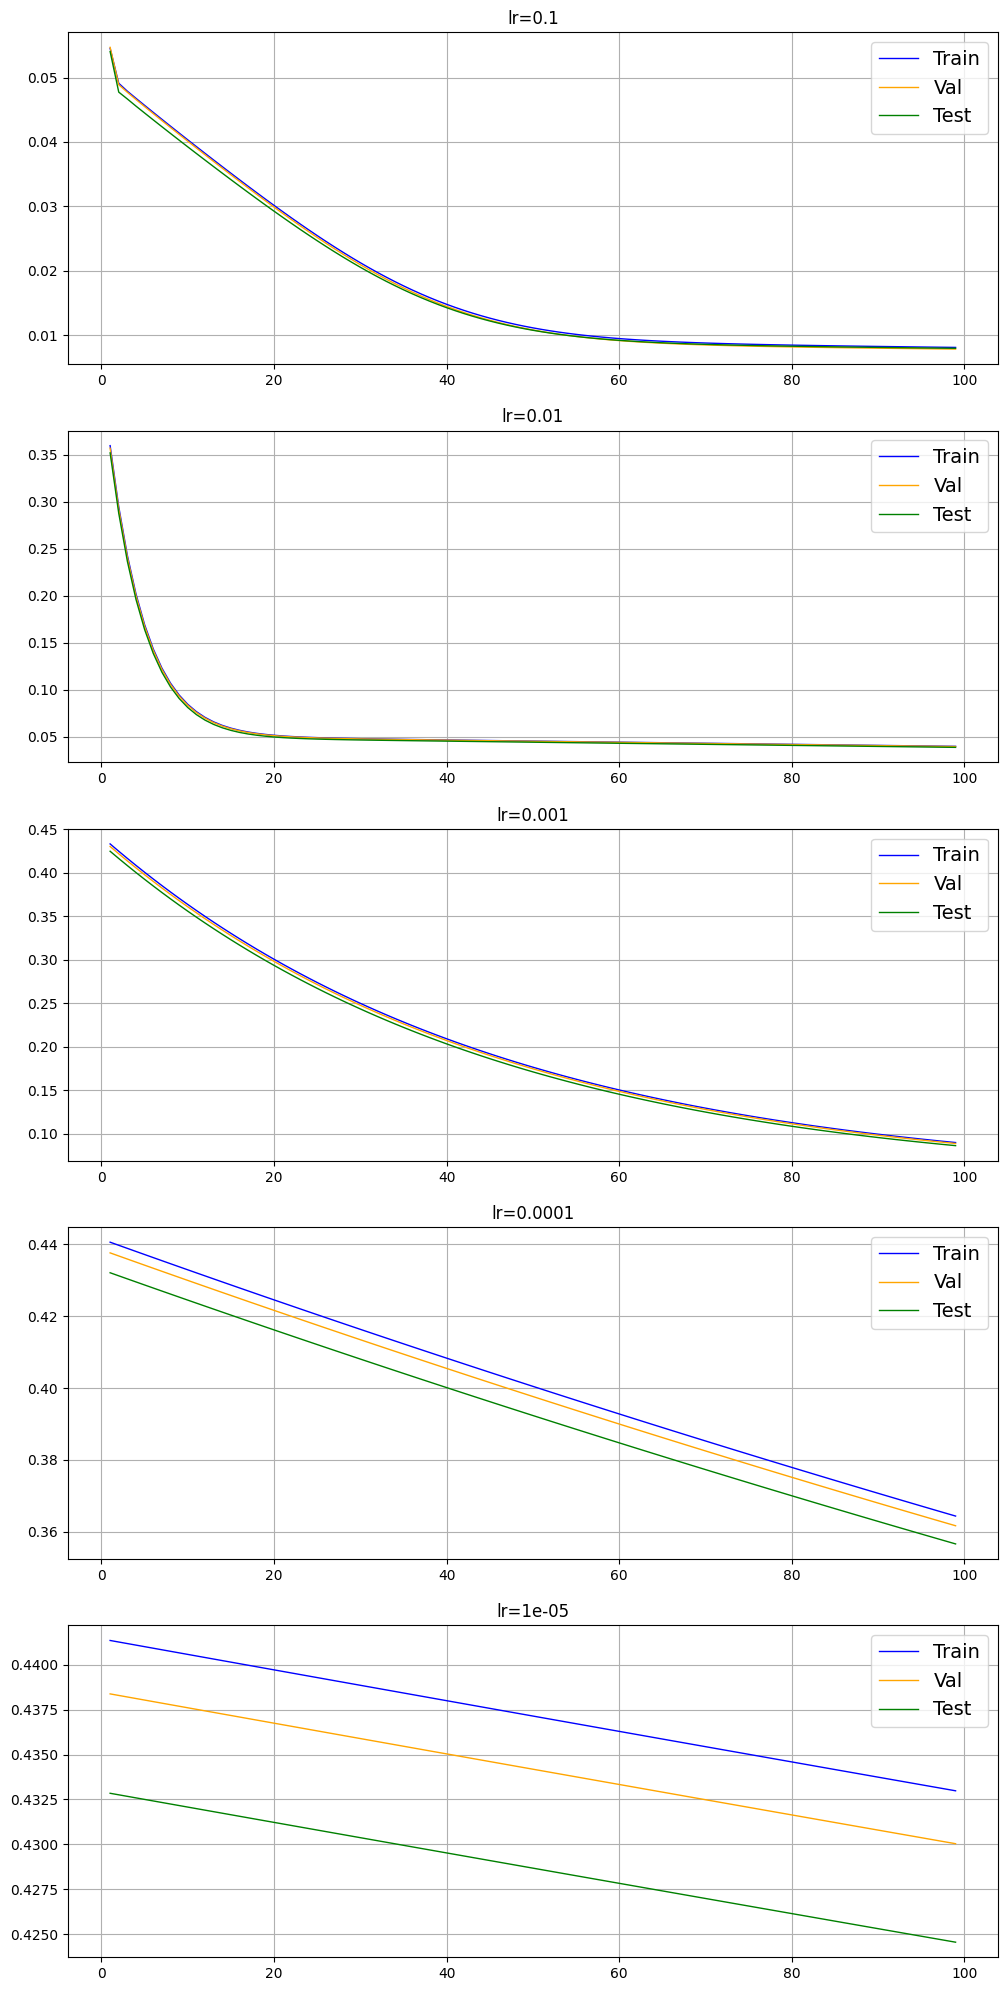

In [ ]:
#@title plot
fig8, ax8 = plt.subplots(5, 1)
fig8.set_size_inches((12, 25))

for i in range(5):
    ax8[i].plot(errors[l_rates[i]]['Epoch'], np.array(errors[l_rates[i]]['Train']),      label='Train',      linewidth=1, color="blue")
    ax8[i].plot(errors[l_rates[i]]['Epoch'], np.array(errors[l_rates[i]]['Validation']), label='Val',        linewidth=1, color="orange")
    ax8[i].plot(errors[l_rates[i]]['Epoch'], np.array(errors[l_rates[i]]['Test']),       label='Test',       linewidth=1, color="green")
    ax8[i].legend(fontsize=14)
    ax8[i].grid()
    ax8[i].set_title(f'lr={l_rates[i]}')
    train_loss = np.array(errors[l_rates[i]]['Train'])[-1]
    test_loss = np.array(errors[l_rates[i]]['Test'])[-1]
    print(f'learning_rate: \t{l_rates[i]}')
    print(f'Train loss: \t{train_loss}')
    print(f'Test loss: \t{test_loss}\n')

#plt.savefig(f'./Graphs/GD_lr={l_rates[i]}_epochs={amountOfEpochs}_1.png', dpi=300)
model.save_weights('./weights/weight_GD_1')

In [ ]:
#@title GDM
momentums = [
    0.0, 
    0.3, 
    0.7, 
    0.9
]

amountOfEpochs = 100
lr = 0.1

errors_GDM = dict()

for momentum in momentums:
    errors_GDM[momentum] = {
        'Train':[], 
        'Validation':[], 
        'Test': [], 
        'Epoch':[]
    }
    
    model.load_weights('./weights/weight_1')
    model.compile(
        optimizer=tf.keras.optimizers.SGD(
            lr=lr,
            momentum=momentum 
        ),
        loss='mse'
    )

    currentEpoch = 1

    while currentEpoch < amountOfEpochs:
        historyOfModel = model.fit(
            x              =_data_train_x, 
            y              =_data_train_y, 
            epochs         =1, 
            validation_data=(_data_validation_x, _data_validation_y),
            batch_size=batch_size
        )
        
        errors_GDM[momentum]['Train'     ].append(model.evaluate(_data_train_x, _data_train_y, batch_size=batch_size, verbose=0))
        errors_GDM[momentum]['Validation'].append(model.evaluate(_data_validation_x, _data_validation_y, batch_size=batch_size, verbose=0))
        errors_GDM[momentum]['Test'      ].append(model.evaluate(_data_test_x, _data_test_y, batch_size=batch_size, verbose=0))
        errors_GDM[momentum]['Epoch'     ].append(currentEpoch)
        
        currentEpoch += 1

1/1 [==============================] - 0s 78ms/step - loss: 0.0400 - val_loss: 0.0396


1/1 [==============================] - 0s 85ms/step - loss: 0.0355 - val_loss: 0.0351


1/1 [==============================] - 0s 111ms/step - loss: 0.0197 - val_loss: 0.0192


1/1 [==============================] - 0s 111ms/step - loss: 0.0081 - val_loss: 0.0078


momentum: 	0.0
Train loss: 	0.03986939787864685
Test loss: 	0.03877837955951691

momentum: 	0.3
Train loss: 	0.035370808094739914
Test loss: 	0.034362852573394775

momentum: 	0.7
Train loss: 	0.019470203667879105
Test loss: 	0.018808651715517044

momentum: 	0.9
Train loss: 	0.008055557496845722
Test loss: 	0.00790578592568636



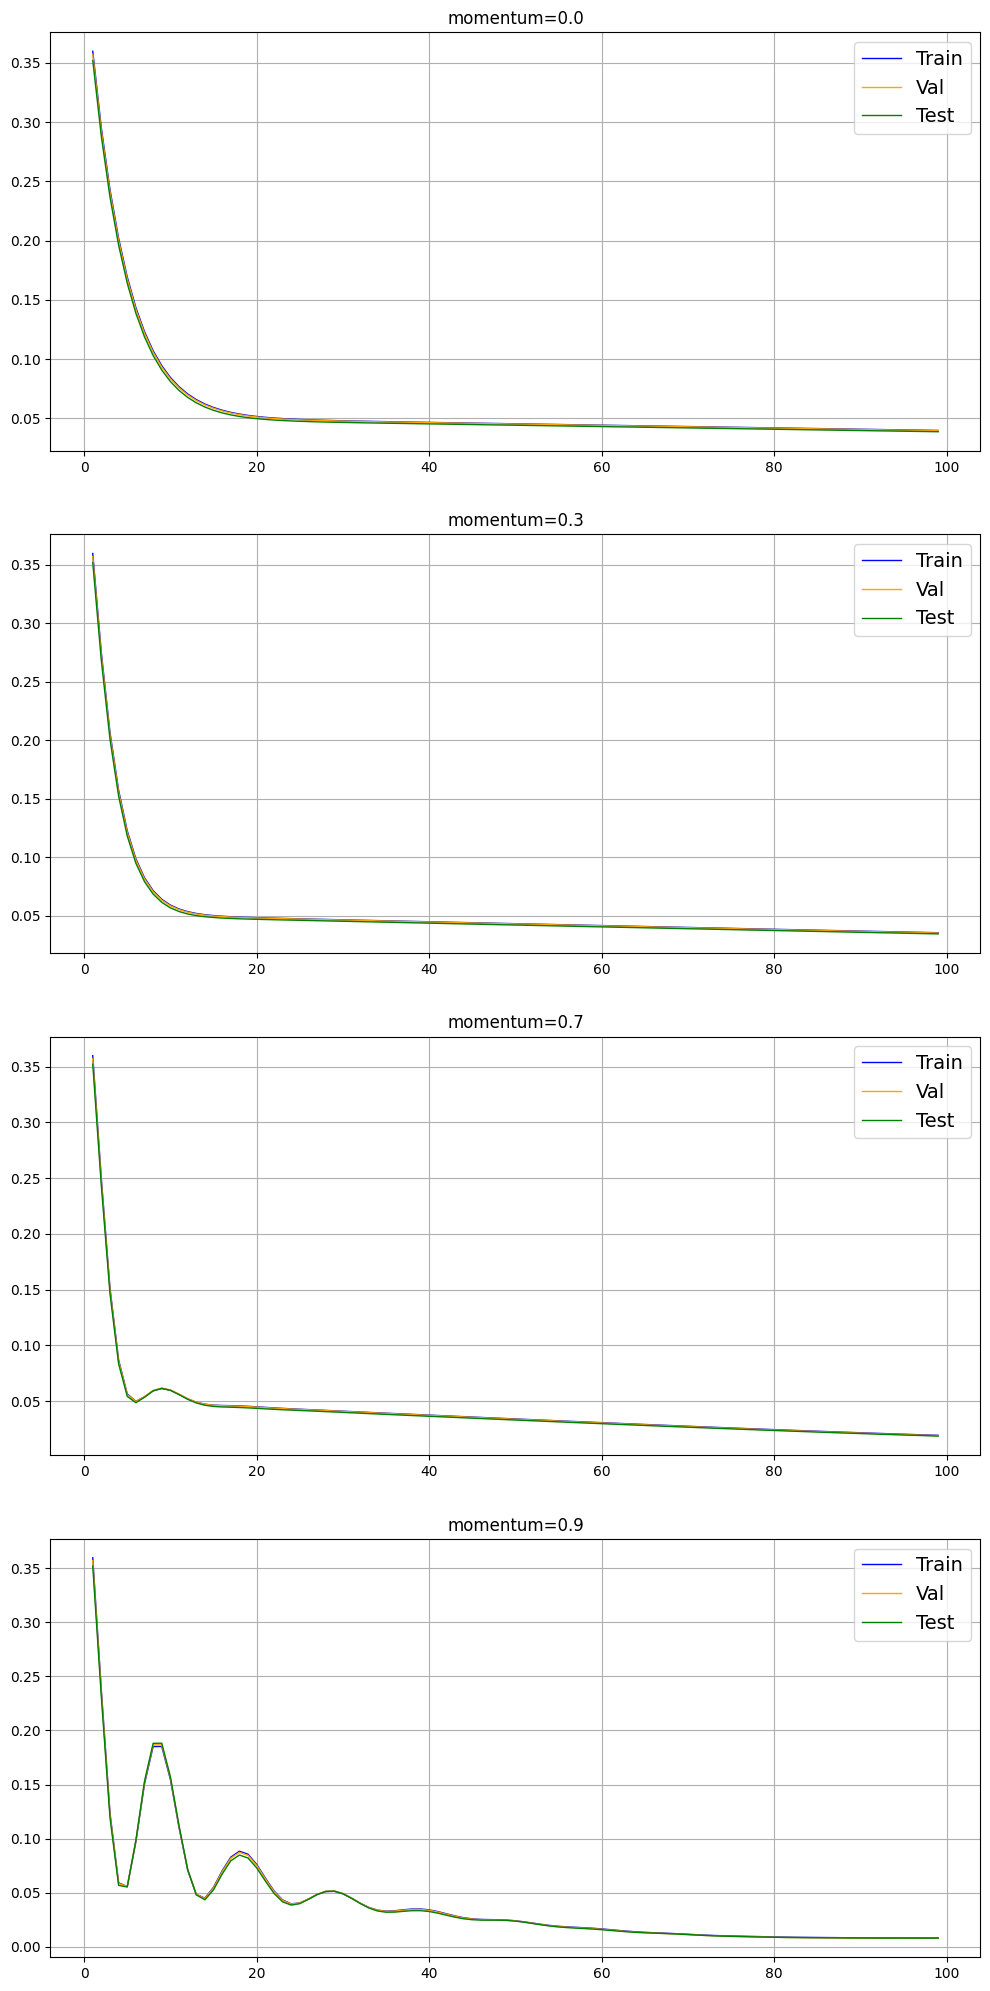

In [ ]:
fig9, ax9 = plt.subplots(len(momentums), 1)
fig9.set_size_inches((12, 25))

for i in range(len(momentums)):
    ax9[i].plot(errors_GDM[momentums[i]]['Epoch'], np.array(errors_GDM[momentums[i]]['Train']),      label='Train',      linewidth=1, color="blue")
    ax9[i].plot(errors_GDM[momentums[i]]['Epoch'], np.array(errors_GDM[momentums[i]]['Validation']), label='Val',        linewidth=1, color="orange")
    ax9[i].plot(errors_GDM[momentums[i]]['Epoch'], np.array(errors_GDM[momentums[i]]['Test']),       label='Test',       linewidth=1, color="green")
    ax9[i].legend(fontsize=14)
    ax9[i].grid()
    ax9[i].set_title(f'momentum={momentums[i]}')
    train_loss = np.array(errors_GDM[momentums[i]]['Train'])[-1]
    test_loss = np.array(errors_GDM[momentums[i]]['Test'])[-1]
    print(f'momentum: \t{momentums[i]}')
    print(f'Train loss: \t{train_loss}')
    print(f'Test loss: \t{test_loss}\n')

#plt.savefig(f'./Graphs/GDM_lr={lr}_momentrum={momentums[i]}_epochs={amountOfEpochs}_1.png', dpi=300)
model.save_weights('./weights/weight_GDM_1')

In [ ]:
#@title NAG
momentums = [
    0.0, 
    0.3, 
    0.7, 
    0.9
]

amountOfEpochs = 100
lr = 0.01

errors_NAG = dict()

for momentum in momentums:
    errors_NAG[momentum] = {
        'Train':[], 
        'Validation':[], 
        'Test': [], 
        'Epoch':[]
    }
    
    model.load_weights('./weights/weight_1')
    model.compile(
        optimizer=tf.keras.optimizers.SGD(
            lr=lr,
            momentum=momentum,
            nesterov=True
        ),
        loss='mse'
    )

    currentEpoch = 1
    
    while currentEpoch < amountOfEpochs:
        historyOfModel = model.fit(
            x              =_data_train_x, 
            y              =_data_train_y, 
            epochs         =1, 
            validation_data=(_data_validation_x, _data_validation_y),
            batch_size=batch_size
        )
        
        errors_NAG[momentum]['Train'     ].append(model.evaluate(_data_train_x, _data_train_y, batch_size=batch_size, verbose=0))
        errors_NAG[momentum]['Validation'].append(model.evaluate(_data_validation_x, _data_validation_y, batch_size=batch_size, verbose=0))
        errors_NAG[momentum]['Test'      ].append(model.evaluate(_data_test_x, _data_test_y, batch_size=batch_size, verbose=0))
        errors_NAG[momentum]['Epoch'     ].append(currentEpoch)
        
        currentEpoch += 1

1/1 [==============================] - 0s 84ms/step - loss: 0.0400 - val_loss: 0.0396


1/1 [==============================] - 0s 152ms/step - loss: 0.0354 - val_loss: 0.0350


1/1 [==============================] - 0s 89ms/step - loss: 0.0192 - val_loss: 0.0187


1/1 [==============================] - 0s 122ms/step - loss: 0.0081 - val_loss: 0.0078


momentum: 	0.0
Train loss: 	0.03986939415335655
Test loss: 	0.03877837583422661

momentum: 	0.3
Train loss: 	0.03528385981917381
Test loss: 	0.0342770591378212

momentum: 	0.7
Train loss: 	0.01899232342839241
Test loss: 	0.01834060065448284

momentum: 	0.9
Train loss: 	0.008101646788418293
Test loss: 	0.007967041805386543



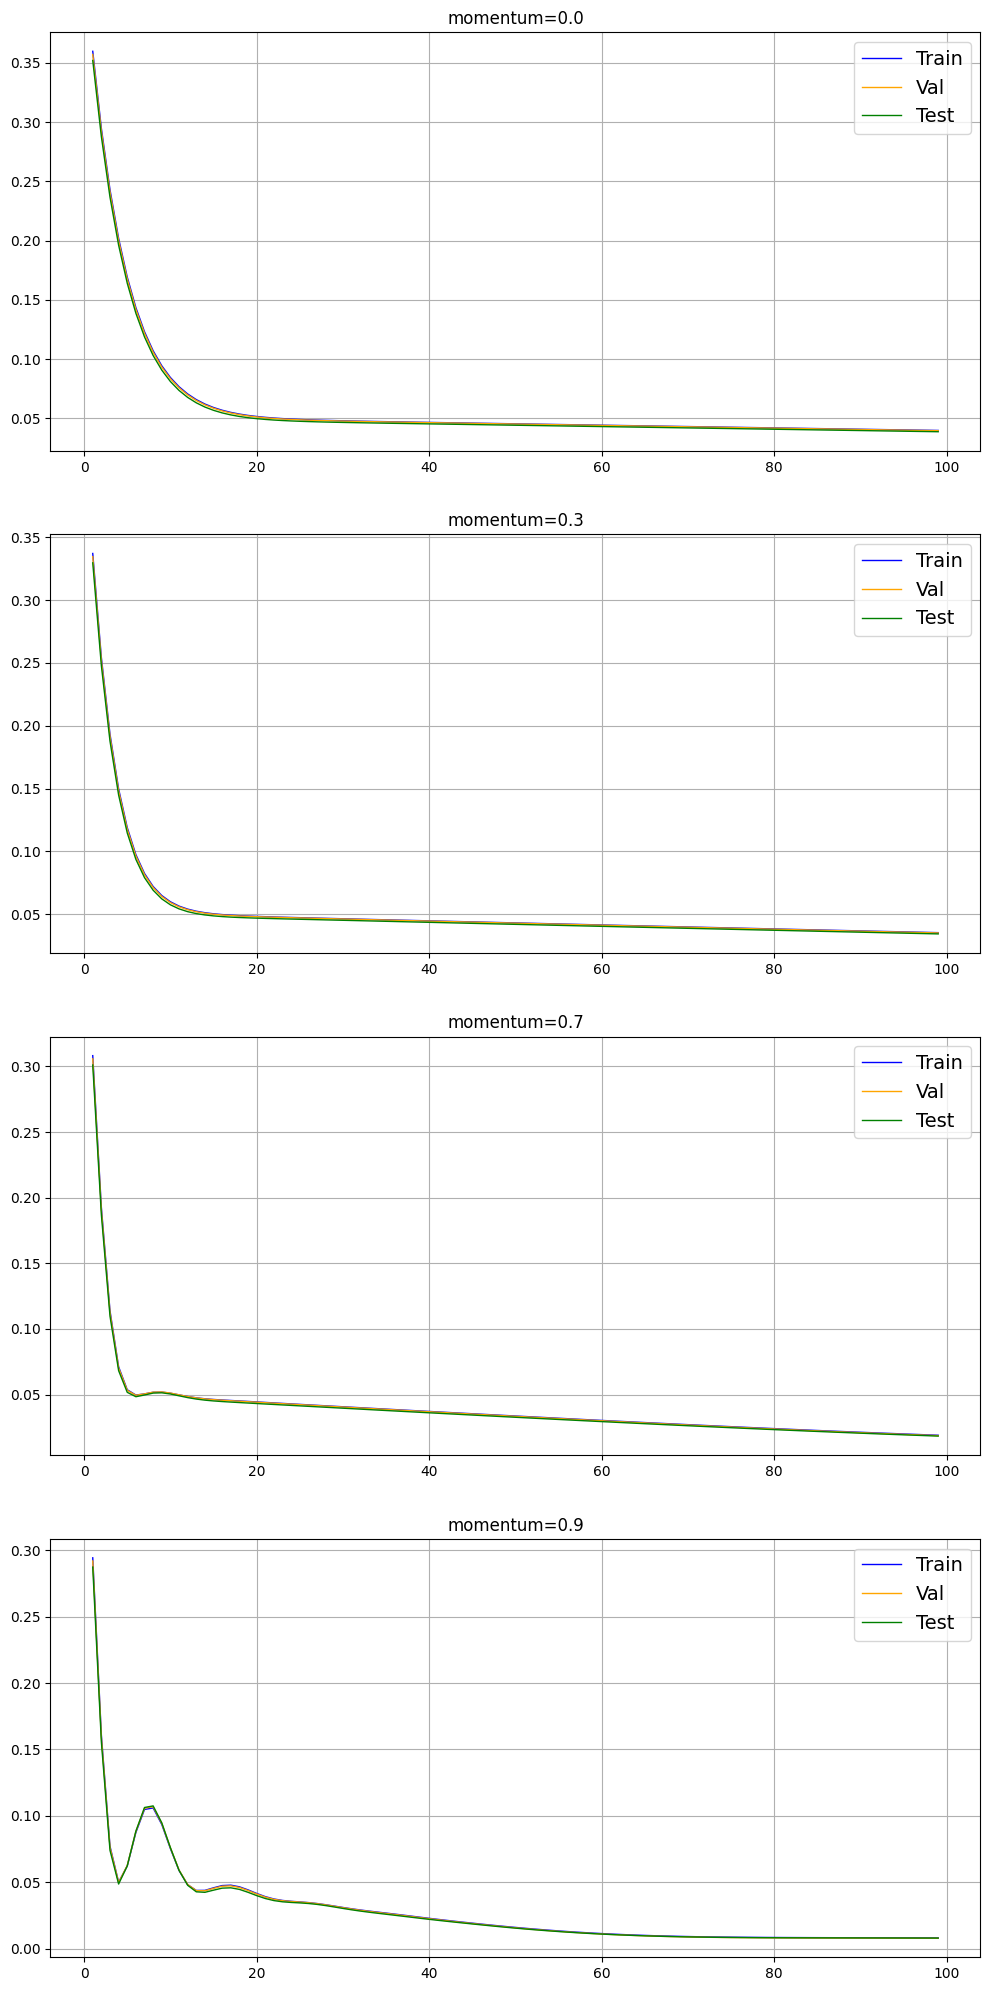

In [ ]:
fig9, ax9 = plt.subplots(len(momentums), 1)
fig9.set_size_inches((12, 25))

for i in range(len(momentums)):
    ax9[i].plot(errors_NAG[momentums[i]]['Epoch'], np.array(errors_NAG[momentums[i]]['Train']),      label='Train',      linewidth=1, color="blue")
    ax9[i].plot(errors_NAG[momentums[i]]['Epoch'], np.array(errors_NAG[momentums[i]]['Validation']), label='Val',        linewidth=1, color="orange")
    ax9[i].plot(errors_NAG[momentums[i]]['Epoch'], np.array(errors_NAG[momentums[i]]['Test']),       label='Test',       linewidth=1, color="green")
    ax9[i].legend(fontsize=14)
    ax9[i].grid()
    ax9[i].set_title(f'momentum={momentums[i]}')
    train_loss = np.array(errors_NAG[momentums[i]]['Train'])[-1]
    test_loss = np.array(errors_NAG[momentums[i]]['Test'])[-1]
    print(f'momentum: \t{momentums[i]}')
    print(f'Train loss: \t{train_loss}')
    print(f'Test loss: \t{test_loss}\n')

#plt.savefig(f'./Graphs/GDM_lr={lr}_momentrum={momentums[i]}_epochs={amountOfEpochs}_1.png', dpi=300)
model.save_weights('./weights/weight_NAG_1')

In [ ]:
df.to_csv('sample_data/data_modified.csv', sep=',')